In [19]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Basic Graph Setup

In [11]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
G.add_nodes_from([2,3]) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

In [12]:
G.nodes()

NodeView((1, 2, 3))

In [13]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [14]:
G[1]

AtlasView({2: {}, 3: {}})

In [15]:
G[1][2]

{}

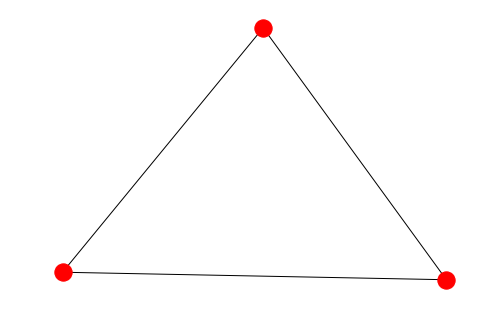

In [17]:
nx.draw(G)

## Anaylsis of a dataset

In [30]:
data = pd.read_csv('Graph Theory-airlines.csv')

In [31]:
data.shape

(100, 16)

In [32]:
data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

Convert values and fix na...

In [33]:
# converting sched_dep_time to 'std' - Scheduled time of departure
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting sched_arr_time to 'sta' - Scheduled time of arrival
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting dep_time to 'atd' - Actual time of departure
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

# converting arr_time to 'ata' - Actual time of arrival
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
# finally we drop the columns we don't need
data = data.drop(columns = ['year', 'month', 'day'])

Create graph using origin and dest as nodes. THe other values will be attributes of the edges.

In [42]:
airlines_graph = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)

In [35]:
airlines_graph.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [36]:
airlines_graph.edges()

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

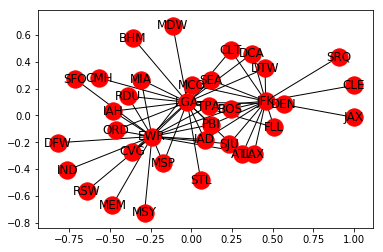

In [37]:
nx.draw_networkx(airlines_graph, with_labels=True) # Quick view of the Graph. As expected we see 3 very busy airports

In [39]:
nx.algorithms.degree_centrality(airlines_graph) # Notice the 3 airports from which all of our 100 rows of data originates

{'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'BOS': 0.05714285714285714,
 'CLE': 0.02857142857142857,
 'CLT': 0.05714285714285714,
 'CMH': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'DCA': 0.05714285714285714,
 'DEN': 0.05714285714285714,
 'DFW': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'EWR': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'IAH': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'JAX': 0.02857142857142857,
 'JFK': 0.4857142857142857,
 'LAX': 0.05714285714285714,
 'LGA': 0.5714285714285714,
 'MCO': 0.08571428571428572,
 'MDW': 0.02857142857142857,
 'MEM': 0.02857142857142857,
 'MIA': 0.05714285714285714,
 'MSP': 0.05714285714285714,
 'MSY': 0.02857142857142857,
 'ORD': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'RDU': 0.05714285714285714,
 'RSW': 0.02857142857142857,
 'SEA': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'SJU': 0.05714285714285714,
 'SRQ': 0.02857142857142857,
 'STL': 0.0285714

In [38]:
nx.density(airlines_graph) # Average edge density of the Graphs

0.09047619047619047

In [40]:
nx.average_shortest_path_length(airlines_graph) # Average shortest path length for ALL paths in the Graph

2.36984126984127

In [41]:
nx.average_degree_connectivity(airlines_graph) # For a node of degree k - What is the average of its neighbours' degree?

{1: 19.307692307692307, 2: 19.0625, 3: 19.0, 17: 2.0588235294117645, 20: 1.95}

In [43]:
# Let us find all the paths available
for path in nx.all_simple_paths(airlines_graph, source='JAX', target='DFW'):
 print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [44]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(airlines_graph, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [45]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(airlines_graph, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']